# 차원축소 Assignment1

## 1) PCA의 과정 차근차근 밟아보기

In [196]:
#기본 모듈 불러오기
import numpy as np
import numpy.linalg as lin
import matplotlib.pyplot as plt
import pandas as pd
import random

In [197]:
#설명변수 x1, x2, x3
x1 = [95, 91, 66, 94, 68, 63, 12, 73, 93, 51, 13, 70, 63, 63, 97, 56, 67, 96, 75, 6]
x2 = [56, 27, 25, 1, 9, 80, 92, 69, 6, 25, 83, 82, 54, 97, 66, 93, 76, 59, 94, 9]
x3 = [57, 34, 9, 79, 4, 77, 100, 42, 6, 96, 61, 66, 9, 25, 84, 46, 16, 63, 53, 30]

In [198]:
#   설명변수들을 하나의 행렬로
X = np.stack((x1,x2,x3),axis=0)

In [199]:
X = pd.DataFrame(X.T,columns=['x1','x2','x3'])

In [200]:
X

,x1,x2,x3
0,95,56,57
1,91,27,34
2,66,25,9
3,94,1,79
4,68,9,4
5,63,80,77
6,12,92,100
7,73,69,42
8,93,6,6
9,51,25,96


### 1-1) 먼저 PCA를 시작하기 전 데이터 scaling!! 중요합니다!

https://datascienceschool.net/03%20machine%20learning/02.01%20%EB%8D%B0%EC%9D%B4%ED%84%B0%20%EC%A0%84%EC%B2%98%EB%A6%AC%20%EA%B8%B0%EC%B4%88.html?highlight=%EC%A0%84%EC%B2%98%EB%A6%AC  를 참고하시면 도움이 될거에요

In [201]:
#scaling
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_std = scaler.fit_transform(X)  #sclaing 후 데이터

In [202]:
X_std

array([[ 1.08573604,  0.02614175,  0.30684189],
       [ 0.93801686, -0.86575334, -0.46445467],
       [ 0.01477192, -0.92726334, -1.30282049],
       [ 1.04880625, -1.66538341,  1.04460382],
       [ 0.08863151, -1.41934339, -1.47049366],
       [-0.09601747,  0.76426183,  0.97753455],
       [-1.97943714,  1.13332186,  1.74883111],
       [ 0.2732805 ,  0.42595679, -0.1961776 ],
       [ 1.01187645, -1.5116084 , -1.40342439],
       [-0.53917504, -0.92726334,  1.61469258],
       [-1.94250735,  0.85652683,  0.44098042],
       [ 0.16249111,  0.82577183,  0.60865359],
       [-0.09601747, -0.03536825, -1.30282049],
       [-0.09601747,  1.28709688, -0.76626636],
       [ 1.15959564,  0.33369178,  1.21227698],
       [-0.35452606,  1.16407687, -0.06203907],
       [ 0.05170172,  0.64124181, -1.06807806],
       [ 1.12266584,  0.11840676,  0.50804969],
       [ 0.3471401 ,  1.19483187,  0.17270336],
       [-2.20101593, -1.41934339, -0.5985932 ]])

In [203]:
features = X_std.T

In [204]:
features

array([[ 1.08573604,  0.93801686,  0.01477192,  1.04880625,  0.08863151,
        -0.09601747, -1.97943714,  0.2732805 ,  1.01187645, -0.53917504,
        -1.94250735,  0.16249111, -0.09601747, -0.09601747,  1.15959564,
        -0.35452606,  0.05170172,  1.12266584,  0.3471401 , -2.20101593],
       [ 0.02614175, -0.86575334, -0.92726334, -1.66538341, -1.41934339,
         0.76426183,  1.13332186,  0.42595679, -1.5116084 , -0.92726334,
         0.85652683,  0.82577183, -0.03536825,  1.28709688,  0.33369178,
         1.16407687,  0.64124181,  0.11840676,  1.19483187, -1.41934339],
       [ 0.30684189, -0.46445467, -1.30282049,  1.04460382, -1.47049366,
         0.97753455,  1.74883111, -0.1961776 , -1.40342439,  1.61469258,
         0.44098042,  0.60865359, -1.30282049, -0.76626636,  1.21227698,
        -0.06203907, -1.06807806,  0.50804969,  0.17270336, -0.5985932 ]])

### 1-2) 다음으로 공분산 행렬을 구합니다

https://docs.scipy.org/doc/numpy/reference/generated/numpy.cov.html 를 참고하시면 도움이 될거에요

In [205]:
cov_matrix = np.cov(features)

In [206]:
cov_matrix

array([[ 1.05263158, -0.2037104 , -0.12079228],
       [-0.2037104 ,  1.05263158,  0.3125801 ],
       [-0.12079228,  0.3125801 ,  1.05263158]])

### 1-3) 이제 고유값과 고유벡터를 구합니다

실습코드를 참고해주세요

In [207]:
import numpy.linalg as lin
# lin.eig return: w(eigenvalues array), v(eigenvectors array)
eigenvalues = lin.eig(cov_matrix)[0]
eigenvectors = lin.eig(cov_matrix)[1]

In [208]:
print(eigenvalues)
print(eigenvectors)

[1.48756162 0.94435407 0.72597904]
[[ 0.47018528 -0.85137353 -0.23257022]
 [-0.64960236 -0.15545725 -0.74421087]
 [-0.59744671 -0.50099516  0.62614797]]


In [209]:
mat = np.zeros((3,3))

In [210]:
mat

array([[0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.]])

In [211]:
mat[0][0] = eigenvalues[0]
mat[1][1] = eigenvalues[1]
mat[2][2] = eigenvalues[2]

In [212]:
mat

array([[1.48756162, 0.        , 0.        ],
       [0.        , 0.94435407, 0.        ],
       [0.        , 0.        , 0.72597904]])

### 1-4) 고유값 분해: 고유값 분해의 곱으로 원래 공분산 행렬을 구해봅니다

https://docs.scipy.org/doc/numpy/reference/generated/numpy.dot.html 를 참고해주세요

$\Sigma=PDP^{-1}$  

In [213]:
cov_matrix_tmp = np.dot(np.dot(eigenvectors, mat), eigenvectors.T)
cov_matrix_tmp
#1-2에서 구했던 공분산과 동일한가요?

array([[ 1.05263158, -0.2037104 , -0.12079228],
       [-0.2037104 ,  1.05263158,  0.3125801 ],
       [-0.12079228,  0.3125801 ,  1.05263158]])

In [214]:
np.allclose(cov_matrix, cov_matrix_tmp) 
# allclose는 0.00001 미만의 차이를 무시하므로 true를 return
# 즉 1-2의 공분산 행렬과 1-4의 공분산 행렬은 동일하다. 

True

### 1-5) 마지막으로 고유 벡터 축으로 값을 변환합니다


https://docs.scipy.org/doc/numpy/reference/generated/numpy.concatenate.html

In [215]:
def new_coordinates(X,eigenvectors):
    for i in range(eigenvectors.shape[0]):
        if i == 0:
            # eigenvector와 X의 선형결합(projection)을 담을 리스트 생성
            new = [np.dot(X, eigenvectors[:, i])]         
        else:
            # 나머지 eigenvector와 X의 선형결합(projection)을 append
            new.append(np.dot(X, eigenvectors[:, i]))
    # 선형결합 결과 전부 합치기 (vstack)
    new = np.stack(new, axis=0)
    return new.T

# 모든 고유 벡터 축으로 데이터를 projection한 값입니다

In [216]:
new_coordinates(X_std,eigenvectors)

# 새로운 축으로 변환되어 나타난 데이터들입니다

array([[ 0.31019368, -1.08215716, -0.07983642],
       [ 1.28092404, -0.43132556,  0.13533091],
       [ 1.38766381,  0.78428014, -0.12911446],
       [ 0.95087515, -1.15737142,  1.6495519 ],
       [ 1.84222365,  0.88189889,  0.11493111],
       [-1.12563709, -0.52680338,  0.06564012],
       [-2.71174416,  0.63290138,  0.71195473],
       [-0.03100441, -0.20059783, -0.50339479],
       [ 2.29618509,  0.07661447,  0.01087174],
       [-0.61585248, -0.205764  ,  1.82651199],
       [-1.73320252,  1.29971699,  0.09045178],
       [-0.82366049, -0.57164535, -0.27123176],
       [ 0.75619512,  0.73995175, -0.76710616],
       [-0.42344386,  0.26555394, -1.41533681],
       [-0.39581307, -1.64646874,  0.24104031],
       [-0.88581498,  0.15195119, -0.82271209],
       [ 0.24587691,  0.39139878, -1.15801831],
       [ 0.14741103, -1.22874561, -0.03110396],
       [-0.7161265 , -0.56781471, -0.86180345],
       [ 0.24475107,  2.39442622,  1.19337361]])

## 2) PCA를 구현해보기

위의 과정을 하나의 함수로 표현해주세요!

1)에서 진행한 과정을 그대로 가져오면 됩니다..! , 

위에서 만든 함수(new_coordinate)도 가져오셔서 사용해도 좋아요!

+하지만 이 함수는 number이라는 인자를 받아서 pca에서 주성분 개수를 고려하도록 합니다!

고유값이 큰 축 순서로 정렬하는 과정 + 주성분 개수 number을 고려해야한다는 점을 유의해서 함수를 정의해주세요


In [217]:
from sklearn.preprocessing import StandardScaler
import numpy.linalg as lin

def MYPCA(X,number):
    # 스케일링
    scaler = StandardScaler()
    X_std = scaler.fit_transform(X)  #sclaing 후 데이터
    features = X_std.T
    
    # 공분산 행렬 계산
    cov_matrix = np.cov(features)
    
    # 고유값과 고유벡터 계산
    eigenvalues = lin.eig(cov_matrix)[0]
    eigenvectors = lin.eig(cov_matrix)[1]    
    
    # 고유값 정렬 및 고유값 크기에 따라 고유벡터도 정렬
    idx = eigenvalues.argsort()[::-1] # eigenvalues를 내림차순으로 정렬한 순서
    eigenvalues = eigenvalues[idx] # eigenvalue값을 내림차순으로 정렬
    eigenvectors = eigenvectors.T[idx].T # eigenvector역시 eigenvalue값의 내림차순 순서로 정렬
    
    # number만큼 주성분 축의 개수 설정
    Z = new_coordinates(X_std, eigenvectors) # 새로운 축으로 변환
    Z = Z[:, :number] 
    
    return  Z #새로운 축으로 변환되어 나타난 데이터 return

In [218]:
MYPCA(X,3)

# 새로운 축으로 잘 변환되어서 나타나나요?
# 위에서 했던 PCA랑은 차이가 있을 수 있어요 
# 왜냐하면 위에서는 고유값이 큰 축 순서로 정렬을 안했었거든요

array([[ 0.31019368, -1.08215716, -0.07983642],
       [ 1.28092404, -0.43132556,  0.13533091],
       [ 1.38766381,  0.78428014, -0.12911446],
       [ 0.95087515, -1.15737142,  1.6495519 ],
       [ 1.84222365,  0.88189889,  0.11493111],
       [-1.12563709, -0.52680338,  0.06564012],
       [-2.71174416,  0.63290138,  0.71195473],
       [-0.03100441, -0.20059783, -0.50339479],
       [ 2.29618509,  0.07661447,  0.01087174],
       [-0.61585248, -0.205764  ,  1.82651199],
       [-1.73320252,  1.29971699,  0.09045178],
       [-0.82366049, -0.57164535, -0.27123176],
       [ 0.75619512,  0.73995175, -0.76710616],
       [-0.42344386,  0.26555394, -1.41533681],
       [-0.39581307, -1.64646874,  0.24104031],
       [-0.88581498,  0.15195119, -0.82271209],
       [ 0.24587691,  0.39139878, -1.15801831],
       [ 0.14741103, -1.22874561, -0.03110396],
       [-0.7161265 , -0.56781471, -0.86180345],
       [ 0.24475107,  2.39442622,  1.19337361]])

## 3) sklearn의 PCA 패키지와 비교해보기

https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html 를 참고하시면 도움이 될거에요

In [219]:
from sklearn.decomposition import PCA

scaler = StandardScaler()
X_std = scaler.fit_transform(X)  #sclaing 후 데이터

pca = PCA(n_components=3) # 앞의 실습과 동일하게 n_components 3 
pca.fit(X_std) # pca 적합 

pca_scaled = pca.transform(X_std) # pca로 데이터 변환 

In [220]:
pca_scaled

array([[-0.31019368, -1.08215716, -0.07983642],
       [-1.28092404, -0.43132556,  0.13533091],
       [-1.38766381,  0.78428014, -0.12911446],
       [-0.95087515, -1.15737142,  1.6495519 ],
       [-1.84222365,  0.88189889,  0.11493111],
       [ 1.12563709, -0.52680338,  0.06564012],
       [ 2.71174416,  0.63290138,  0.71195473],
       [ 0.03100441, -0.20059783, -0.50339479],
       [-2.29618509,  0.07661447,  0.01087174],
       [ 0.61585248, -0.205764  ,  1.82651199],
       [ 1.73320252,  1.29971699,  0.09045178],
       [ 0.82366049, -0.57164535, -0.27123176],
       [-0.75619512,  0.73995175, -0.76710616],
       [ 0.42344386,  0.26555394, -1.41533681],
       [ 0.39581307, -1.64646874,  0.24104031],
       [ 0.88581498,  0.15195119, -0.82271209],
       [-0.24587691,  0.39139878, -1.15801831],
       [-0.14741103, -1.22874561, -0.03110396],
       [ 0.7161265 , -0.56781471, -0.86180345],
       [-0.24475107,  2.39442622,  1.19337361]])

In [221]:
MYPCA(X,3)

array([[ 0.31019368, -1.08215716, -0.07983642],
       [ 1.28092404, -0.43132556,  0.13533091],
       [ 1.38766381,  0.78428014, -0.12911446],
       [ 0.95087515, -1.15737142,  1.6495519 ],
       [ 1.84222365,  0.88189889,  0.11493111],
       [-1.12563709, -0.52680338,  0.06564012],
       [-2.71174416,  0.63290138,  0.71195473],
       [-0.03100441, -0.20059783, -0.50339479],
       [ 2.29618509,  0.07661447,  0.01087174],
       [-0.61585248, -0.205764  ,  1.82651199],
       [-1.73320252,  1.29971699,  0.09045178],
       [-0.82366049, -0.57164535, -0.27123176],
       [ 0.75619512,  0.73995175, -0.76710616],
       [-0.42344386,  0.26555394, -1.41533681],
       [-0.39581307, -1.64646874,  0.24104031],
       [-0.88581498,  0.15195119, -0.82271209],
       [ 0.24587691,  0.39139878, -1.15801831],
       [ 0.14741103, -1.22874561, -0.03110396],
       [-0.7161265 , -0.56781471, -0.86180345],
       [ 0.24475107,  2.39442622,  1.19337361]])

## 4) PCA 외 수업에서 다룬 차원축소 기법(FS,GA,LDA,SNE 등) 중 택1하여 밑바닥부터 만들어보기

## LDA

LDA는 데이터를 다른 한 축에 사영(projection) 시킴으로써 차원을 축소시킴과 동시에 데이터 라벨로 범주를 잘 구분할 수 있는 직선을 찾는 것을 목표로 한다. 두 범주를 잘 구분할 수 있도록 하기 위해선 사영 후 두 클래스 간 분산은 최대한 크게 가져가고 클래스 내부의 분산은 최대한 작게 가져가는 방식이다. 

각각 $n_1, n_2$ 개의 관측치를 갖는 $c_1, c_2$ 두 범주가 있다고 가정.  
$\bar{x_c}$  : c범주 데이터셋의 평균  
$\bar{x}$ : 전체 범주 데이터셋의 평균  

#### 1) Within-class scatter matrix  (클래스 내부의 분산)
$S_W$ = $\sum_{c}S_c$

$S_c$ = $\sum_{c}(x_i-\bar{x_c})(x_i-\bar{x_c})^T$
#### 2) Between class scatter matrix  (클래스 간 분산)
$S_B$ = $\sum_{c}n_c(\bar{x_c}-\bar{x})(\bar{x_c}-\bar{x})^T$ 

$\Rightarrow$$S_W^{-1}S_B$를 Eigen-value Decomposition 하여 PCA와 동일한 방법으로 차원축소 

### KMEANS
LDA는 label class가 필요한 지도학습 모델이므로 kmeans 군집분석을 통해 임의로 label 생성

In [222]:
from sklearn.cluster import KMeans

In [225]:
model = KMeans(n_clusters=2)
model.fit(X)
y_predict = model.predict(X)
X['y'] = y_predict # kmeans의 cluster를 label로 활용

**cluster로 생성한 label 기준으로 3D 시각화**

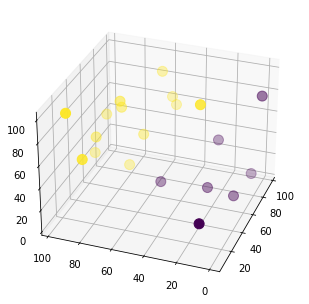

In [226]:
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = Axes3D(fig)
ax.scatter(X.iloc[:,0], X.iloc[:,1],X.iloc[:,2], c=model.labels_, s=100)
ax.view_init(azim=200)
plt.show()

### LDA 구현하기

LDA에서는 data scaling 적용하지 않음

In [258]:
import numpy.linalg as lin

def MYLDA(X,y,number):
    # scatter matrix 계산 
    n_features = X.shape[1]
    class_labels = np.unique(y)
    
    # S_W, S_B
    mean_overall = np.mean(X, axis=0)
    S_W = np.zeros((n_features, n_features)) # 3,3
    S_B = np.zeros((n_features, n_features)) # 3,3
    for c in class_labels:
        X_c = X[y==c] # c범주에 속하는 데이터 샘플 
        mean_c = np.mean(X_c, axis=0)
        # (3, n_c) * (n_c, 3) = (3,3) : S_W의 shape을 맞추기 위해 Transpose먼저 계산 
        S_W += (X_c - mean_c).T.dot(X_c - mean_c)
        
        n_c = X_c.shape[0] # c범주에 속하는 데이터 샘플 개수 
        # (3, 1) * (1, 3) 계산을 하기 위해 (3,)벡터를 (3,1)벡터로 변환 
        mean_diff = (mean_c - mean_overall).reshape(n_features, 1)
        S_B += n_c * (mean_diff).dot(mean_diff.T)
    
    A = np.linalg.inv(S_W).dot(S_B)
        
    # 고유값과 고유벡터 계산
    eigenvalues = lin.eig(A)[0]
    eigenvectors = lin.eig(A)[1]    
    
    # 고유값 정렬 및 고유값 크기에 따라 고유벡터도 정렬
    idx = eigenvalues.argsort()[::-1] # eigenvalues를 내림차순으로 정렬한 순서
    eigenvalues = eigenvalues[idx] # eigenvalue값을 내림차순으로 정렬
    eigenvectors = eigenvectors.T[idx].T # eigenvector역시 eigenvalue값의 내림차순 순서로 정렬
    
    # number만큼 주성분 축의 개수 설정
    Z = new_coordinates(X, eigenvectors) # 새로운 축으로 변환
    Z = Z[:, :number] 
    
    return  Z #새로운 축으로 변환되어 나타난 데이터 return

In [261]:
df_X = np.array(X.iloc[:, :-1])
y = np.array(X['y'])

In [277]:
# fit LDA
z = MYLDA(df_X, y, 3)
z

array([[  89.2758264 ,  100.25826161, -100.25826161],
       [  52.57214914,   93.64483655,  -93.64483655],
       [  35.32914133,   67.71492476,  -67.71492476],
       [  52.00513505,   96.56502047,  -96.56502047],
       [  19.35562693,   68.52936691,  -68.52936691],
       [ 115.10623224,   70.54596875,  -70.54596875],
       [ 129.28004403,   21.23208495,  -21.23208495],
       [  90.24182199,   78.61180924,  -78.61180924],
       [  21.25838827,   93.34546518,  -93.34546518],
       [  74.83991112,   55.77692776,  -55.77692776],
       [ 102.95803398,   20.30803326,  -20.30803326],
       [ 112.56732433,   77.27144987,  -77.27144987],
       [  60.03248986,   66.54721433,  -66.54721433],
       [ 104.94990716,   69.80854565,  -69.80854565],
       [ 111.14660836,  103.82047503, -103.82047503],
       [ 110.54175435,   63.30473014,  -63.30473014],
       [  83.01307276,   72.16424289,  -72.16424289],
       [  94.88873152,  101.65291712, -101.65291712],
       [ 117.45270695,   82.

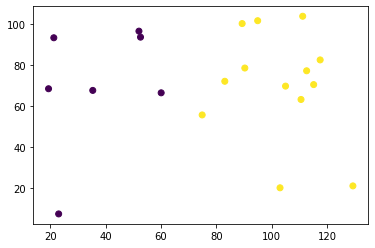

In [280]:
plt.scatter(x=z[:, 0], y=z[:, 1], c=y)

lda를 적합한 후에 첫 번째 주성분과 두 번째 주성분의 scatterplot을 그려본 결과, label에 따른 분포가 나뉘는 것을 확인할 수 있다. 